## Question - Is there any relationship between the GDP of a country and the percentage of its Internet users?

In [1]:
import bs4 as bs
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error

uh = urllib.request.urlopen('https://www.cia.gov/library/publications/the-world-factbook/')
html = uh.read().decode()

In [2]:
soup = BeautifulSoup(html, 'html.parser')
countryCodes = []
countryNames = []

for tag  in soup.find_all('option'):
    countryCodes.append(tag.get('value')[5:7])
    countryNames.append(tag.text)
#Remove first element
countryCodes.pop(0)
countryNames.pop(0)
#Remove world
countryCodes.pop(0)
countryNames.pop(0)

x = []
for Str in countryNames:
    Str = Str.replace(' ', '')
    Str = Str.replace('\n', '')
    x.append(Str)
countryNames = x

In [3]:
textData = dict()

for i in range(0, len(countryNames)):
    urlToGet = 'https://www.cia.gov/library/publications/the-world-factbook/geos/' + countryCodes[i] + '.html'
    html = urllib.request.urlopen(urlToGet).read()
    soup = BeautifulSoup(html, 'html.parser')
    txt = soup.get_text()
    textData[countryNames[i]] = txt

print("Finished downloading data from countries.")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
Finished downloading data from countries.


In [3]:
## Serialize data to poster lecture
import pickle
#pickle.dump(textData, open("Files/TextData_Countries_CIA.p", "wb"))

textData = pickle.load(open("Files/TextData_Countries_CIA.p" , 'rb'))

In [4]:
import re

GDP_PPP = {}
Countries_Without_GDP = []

for i in range(0, len(countryNames)):
    txt = textData[countryNames[i]]
    pos = txt.find('GDP - per capita (PPP):')
    if pos != -1:
        pos = pos + len('GDP - per capita (PPP):')
        String = txt[pos+148:pos+170]
        start = re.search('\$', String)
        end = re.search('\(', String)
        NA = re.search('NA', String)

        if (start != None and end != None and NA == None):
            start = start.start()
            end = end.start()
            x = String[start+1:start+end-2]
            x = x.replace(',', '')
            #print(countryNames[i])
            x = float(x)
            GDP_PPP[countryNames[i]] = x
    else:
        #print("{}, no tiene GDP ".format(countryCodes[i]))
        Countries_Without_GDP.append(countryCodes[i])

GDP_PPP

{'Afghanistan': 2000.0,
 'Albania': 12500.0,
 'Algeria': 15200.0,
 'AmericanSamoa': 11200.0,
 'Andorra': 49900.0,
 'Angola': 6800.0,
 'Anguilla': 12200.0,
 'AntiguaandBarbuda': 26400.0,
 'Argentina': 20900.0,
 'Armenia': 9500.0,
 'Aruba': 37500.0,
 'Australia': 50400.0,
 'Austria': 50000.0,
 'Azerbaijan': 17500.0,
 'Bahamas,The': 32400.0,
 'Bahrain': 49000.0,
 'Bangladesh': 4200.0,
 'Barbados': 18600.0,
 'Belarus': 18900.0,
 'Belgium': 46600.0,
 'Belize': 8300.0,
 'Benin': 2300.0,
 'Bermuda': 99400.0,
 'Bhutan': 9000.0,
 'Bolivia': 7600.0,
 'BosniaandHerzegovina': 12800.0,
 'Botswana': 17000.0,
 'Brazil': 15600.0,
 'BritishVirginIslands': 34200.0,
 'Brunei': 78900.0,
 'Bulgaria': 21800.0,
 'BurkinaFaso': 1900.0,
 'Burma': 6300.0,
 'Burundi': 700.0,
 'CaboVerde': 7000.0,
 'Cambodia': 4000.0,
 'Cameroon': 3700.0,
 'Canada': 48400.0,
 'CaymanIslands': 43800.0,
 'CentralAfricanRepublic': 700.0,
 'Chad': 2300.0,
 'Chile': 24600.0,
 'China': 18200.0,
 'Colombia': 14400.0,
 'Comoros': 1600.0,

In [41]:

urlToGet = 'https://www.cia.gov/library/publications/the-world-factbook/fields/204.html#SP'
html = urllib.request.urlopen(urlToGet).read()
soup = BeautifulSoup(html, 'html.parser')
table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id'] == 'fieldListing')
table = table.find(name = 'tbody')
rows = table.findAll(name = 'tr')

InternetUsers = {}

for row in rows:
    #first td
    td = row.find(lambda tag: tag.name == 'td' and tag.has_attr('class'))
    a = td.find(name='a')
    if a.text in countryNames:

        #Second td
        td = td.find_next_sibling()
        div = td.find(lambda tag: tag.name=='div' and tag.has_attr('id') and tag['id'] == 'field-internet-users')
        div = div.find_next()
        div = div.find_next_sibling()
        #number = div.find(lambda tag: tag.name=='span' and tag.has_attr('class') and  tag['class'] == 'subfield-number')
        number = div.find_next()
        number = number.find_next()
        String = number.text
        String = String.replace('%', '')
        number = float(String)
        InternetUsers[a.text] = number
InternetUsers

{'Afghanistan': 13.5,
 'Albania': 71.85,
 'Algeria': 59.58,
 'Andorra': 91.57,
 'Angola': 14.34,
 'Anguilla': 81.57,
 'Antarctica': 100.0,
 'Argentina': 74.29,
 'Armenia': 64.74,
 'Aruba': 97.17,
 'Australia': 86.55,
 'Austria': 87.71,
 'Azerbaijan': 79.8,
 'Bahrain': 98.64,
 'Bangladesh': 15.0,
 'Barbados': 81.76,
 'Belarus': 79.13,
 'Belgium': 88.66,
 'Belize': 47.08,
 'Benin': 20.0,
 'Bermuda': 98.37,
 'Bhutan': 48.11,
 'Bolivia': 43.83,
 'Botswana': 47.0,
 'Brazil': 67.47,
 'Brunei': 94.6,
 'Bulgaria': 64.78,
 'Burma': 30.68,
 'Burundi': 2.66,
 'Cambodia': 40.0,
 'Cameroon': 23.2,
 'Canada': 91.0,
 'Chad': 6.5,
 'Chile': 82.33,
 'China': 54.3,
 'Colombia': 62.26,
 'Comoros': 8.48,
 'Croatia': 72.69,
 'Cuba': 57.15,
 'Curacao': 68.13,
 'Cyprus': 84.43,
 'Czechia': 80.69,
 'Denmark': 97.64,
 'Djibouti': 55.68,
 'Dominica': 69.62,
 'Ecuador': 57.27,
 'Egypt': 46.92,
 'Eritrea': 1.31,
 'Estonia': 89.36,
 'Eswatini': 47.0,
 'Ethiopia': 18.62,
 'Fiji': 49.97,
 'Finland': 88.89,
 'France'

In [98]:
import pandas as pd
Data = pd.DataFrame({ 'GDP_PPP': pd.Series(GDP_PPP), 'Internet_users_percent': pd.Series(InternetUsers)})
Data = Data.dropna()
#Data = Data.fillna(value=0)
Data

,GDP_PPP,Internet_users_percent
Afghanistan,2000.0,13.50
Albania,12500.0,71.85
Algeria,15200.0,59.58
Andorra,49900.0,91.57
Angola,6800.0,14.34
...,...,...
Venezuela,12500.0,72.00
Vietnam,6900.0,70.35
Yemen,2500.0,26.72
Zambia,4000.0,14.30


,GDP_PPP,Internet_users_percent
Bahrain,49000.0,98.64


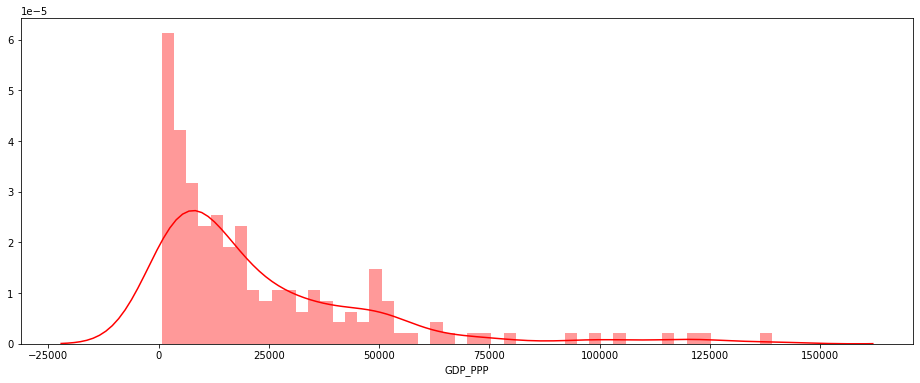

In [99]:
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 16, 6

fig = sns.distplot(Data['GDP_PPP'], bins=50, color='red')

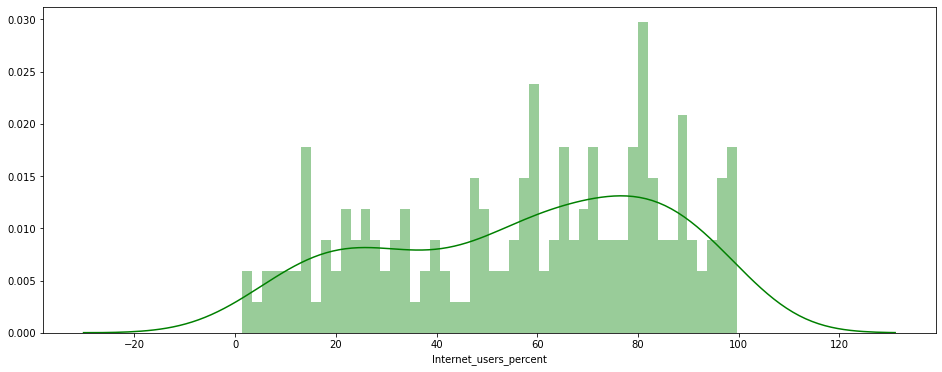

In [100]:
fig = sns.distplot(Data['Internet_users_percent'], bins=50, color='Green')

In [119]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(Data['GDP_PPP'], Data['Internet_users_percent'])

print("slope: %f    intercept: %f       R squared: %f" % (slope, intercept, r_value**2))
#obtuve un rcuadrado de 0.5 eso quiere decir que tengo una correlacion debil positiva, weak postitive correlation y en este caso de una regression lineal simple verdaderamente no existe un relacion fuerte entre el PIB y el porcentaje de usuarios de internet de cada pais, aunque es bien sabido que un pais entre mas posibilidades economicas tenga, logicamente tiene mas acceso a recursos de altos costos como lo es el internet.

slope: 0.000756    intercept: 39.899748       R squared: 0.505974


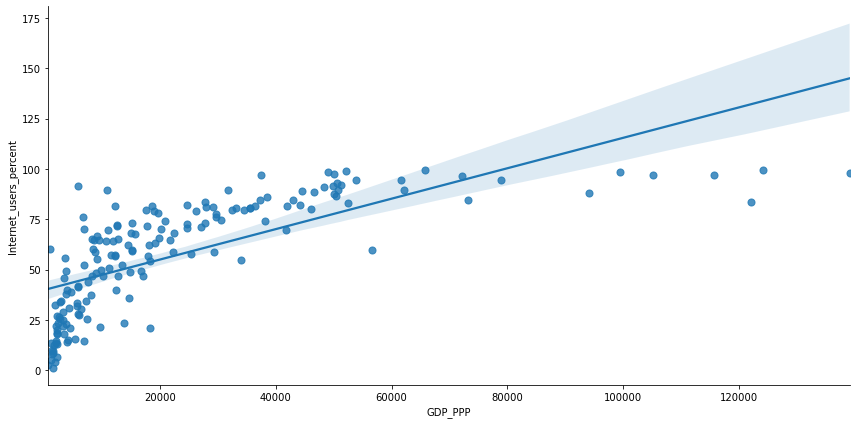

In [115]:
fig = sns.lmplot(
    data = Data,
    x = 'GDP_PPP', 
    y_jitter= = 'Internet_users_percent',
    fit_reg=True,
    size=6, 
    aspect=2,
    scatter_kws= { #Parametros desde plt
        "s":50
    }
    )
#fig.set(yticks= range(0, int(Data['GDP_PPP'].max()), 20000))